## Example: Determine flat-field

Data collected at I08 beamline at the Diamond Light Source

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi

### 1. Load the data

In [2]:
data_path = "/dls/i08/data/2015/sp11038-2/processing/scan_1715.h5"
with h5py.File(data_path, "r") as f:
    data = f["data"][:]
    pos = f["positions"][:]
    bad = f["bad"][:]
    mask = f["mask"][:]
    sumq = f["sum"][:]
    psize = float(f["psize"][...])

In [3]:
shifts0 = (pos/psize).astype(int)

### 2. Initialize

In [4]:
import afstitch
afs = afstitch.AlignFactorStitch(data, shifts=shifts0, scalar=None, mask=mask, max_shift=20)

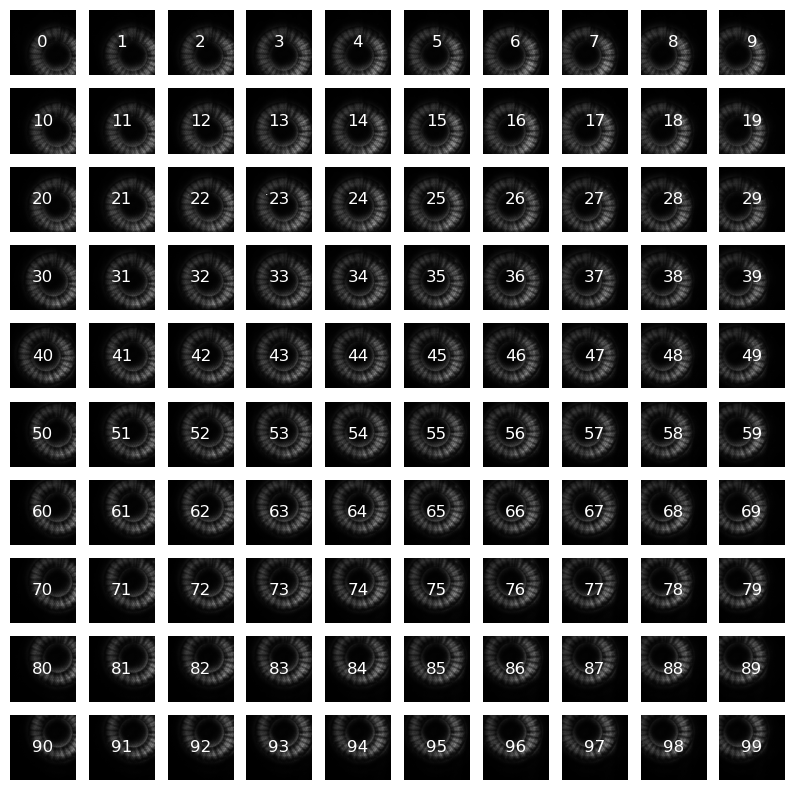

In [5]:
fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(10,10), dpi=100)
for i in range(100):
    axes[i//10,i%10].axis("off")
    axes[i//10,i%10].set_title(i,y=0.3, color="w")
    axes[i//10,i%10].imshow(afs.images[i], cmap="gray", vmin=0, vmax=4000)
plt.show()

### 3. Run iterative solver to determine flat-field

In [6]:
afs.solve(refine_scalar=True, max_iter=5)

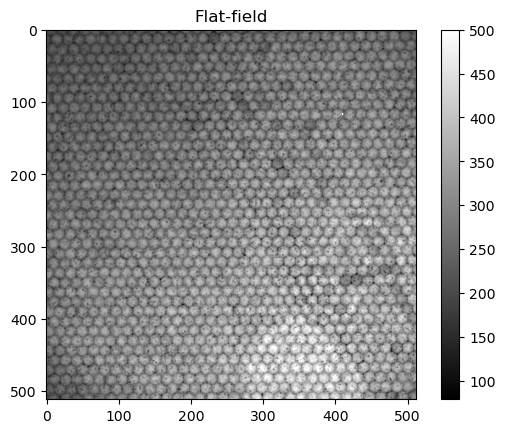

In [7]:
plt.figure()
plt.title("Flat-field")
plt.imshow(afs.scalar, cmap="gray", vmax=500)
plt.colorbar()
plt.show()

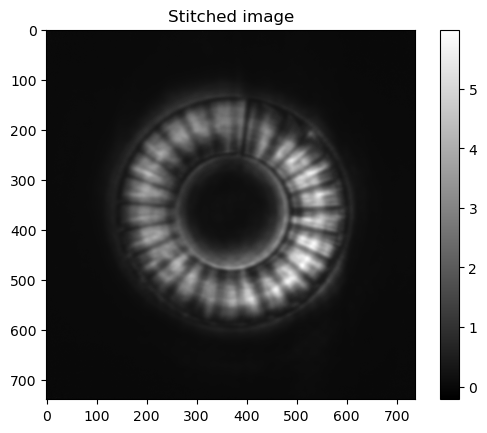

In [8]:
plt.figure()
plt.title("Stitched image")
plt.imshow(afs.stitched, cmap="gray")
plt.colorbar()
plt.show()